In [99]:
import pandas as pd

In [100]:
# Load the CSV file
df = pd.read_csv('cleaned_steam_data.csv')

In [101]:
# Select relevant columns and create a copy
df_cleaned = df[['AppID', 'Name', 'Positive_ratings', 'Negative_ratings', 'Price']].copy()

In [102]:
# Compute the rating difference
df_cleaned['Rating_difference'] = df_cleaned['Positive_ratings'] - df_cleaned['Negative_ratings']

In [103]:
# Filter out games priced over $100
df_cleaned = df_cleaned[df_cleaned['Price'] <= 100]

In [104]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23236 entries, 0 to 23238
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AppID              23236 non-null  int64  
 1   Name               23236 non-null  object 
 2   Positive_ratings   23236 non-null  int64  
 3   Negative_ratings   23236 non-null  int64  
 4   Price              23236 non-null  float64
 5   Rating_difference  23236 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.2+ MB


In [105]:
df_cleaned.head()

,AppID,Name,Positive_ratings,Negative_ratings,Price,Rating_difference
0,263380,Driftmoon,223,28,14.99,195
1,263340,Continue?9876543210,97,78,9.99,19
2,262550,Gunman Clive,656,86,1.99,570
3,264320,Captain Morgane and the Golden Turtle,102,66,4.99,36
4,263680,Unearthed: Trail of Ibn Battuta - Episode 1 - ...,429,380,4.99,49


In [106]:
# Save the cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [107]:
print("CSV file cleaned and saved as 'cleaned_data.csv'.")

CSV file cleaned and saved as 'cleaned_data.csv'.


In [108]:
from pymongo import MongoClient
import pandas as pd

In [109]:
# Load the cleaned CSV file
df_cleaned = pd.read_csv('cleaned_data.csv')

In [110]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['app_data']
collection = db['apps']

In [111]:
# Convert DataFrame to dictionary and insert into MongoDB
data_dict = df_cleaned.to_dict(orient='records')
collection.insert_many(data_dict)

InsertManyResult([ObjectId('66dc07d96b563aff29431887'), ObjectId('66dc07d96b563aff29431888'), ObjectId('66dc07d96b563aff29431889'), ObjectId('66dc07d96b563aff2943188a'), ObjectId('66dc07d96b563aff2943188b'), ObjectId('66dc07d96b563aff2943188c'), ObjectId('66dc07d96b563aff2943188d'), ObjectId('66dc07d96b563aff2943188e'), ObjectId('66dc07d96b563aff2943188f'), ObjectId('66dc07d96b563aff29431890'), ObjectId('66dc07d96b563aff29431891'), ObjectId('66dc07d96b563aff29431892'), ObjectId('66dc07d96b563aff29431893'), ObjectId('66dc07d96b563aff29431894'), ObjectId('66dc07d96b563aff29431895'), ObjectId('66dc07d96b563aff29431896'), ObjectId('66dc07d96b563aff29431897'), ObjectId('66dc07d96b563aff29431898'), ObjectId('66dc07d96b563aff29431899'), ObjectId('66dc07d96b563aff2943189a'), ObjectId('66dc07d96b563aff2943189b'), ObjectId('66dc07d96b563aff2943189c'), ObjectId('66dc07d96b563aff2943189d'), ObjectId('66dc07d96b563aff2943189e'), ObjectId('66dc07d96b563aff2943189f'), ObjectId('66dc07d96b563aff294318

In [112]:
print("Data inserted into MongoDB.")

Data inserted into MongoDB.


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [114]:
# Load cleaned data
df_cleaned = pd.read_csv('cleaned_data.csv')

In [115]:
# Define plot creation function
def create_plot(x_col, y_col, title, filename):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=x_col, y=y_col, data=df_cleaned)
    plt.title(title)
    plt.xlabel('Price')
    plt.ylabel(y_col)
    plt.savefig(filename)
    plt.show()
    plt.close()

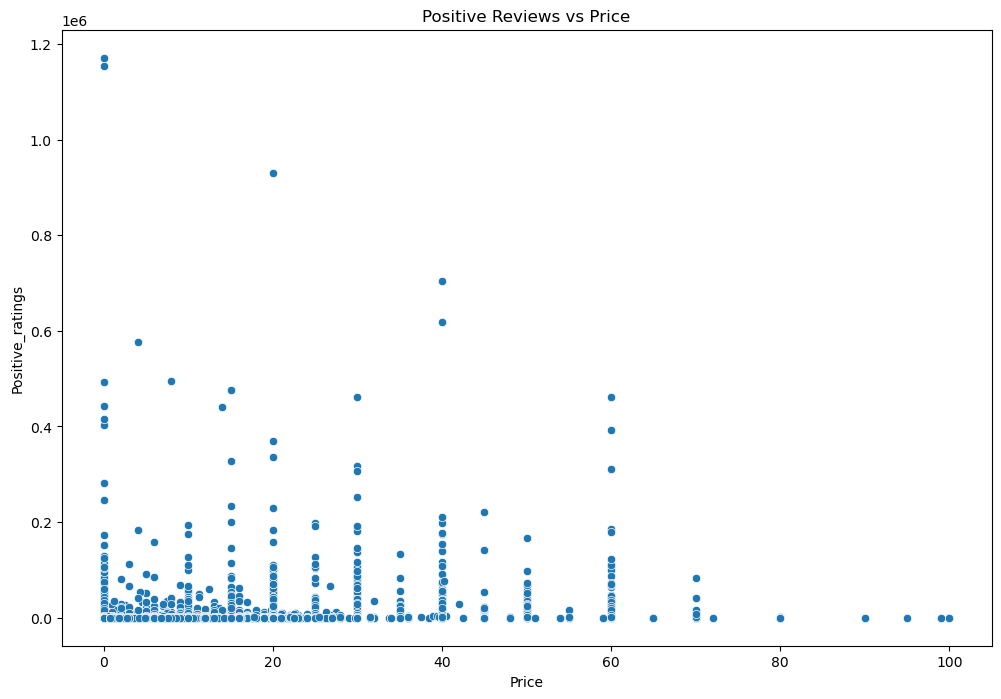

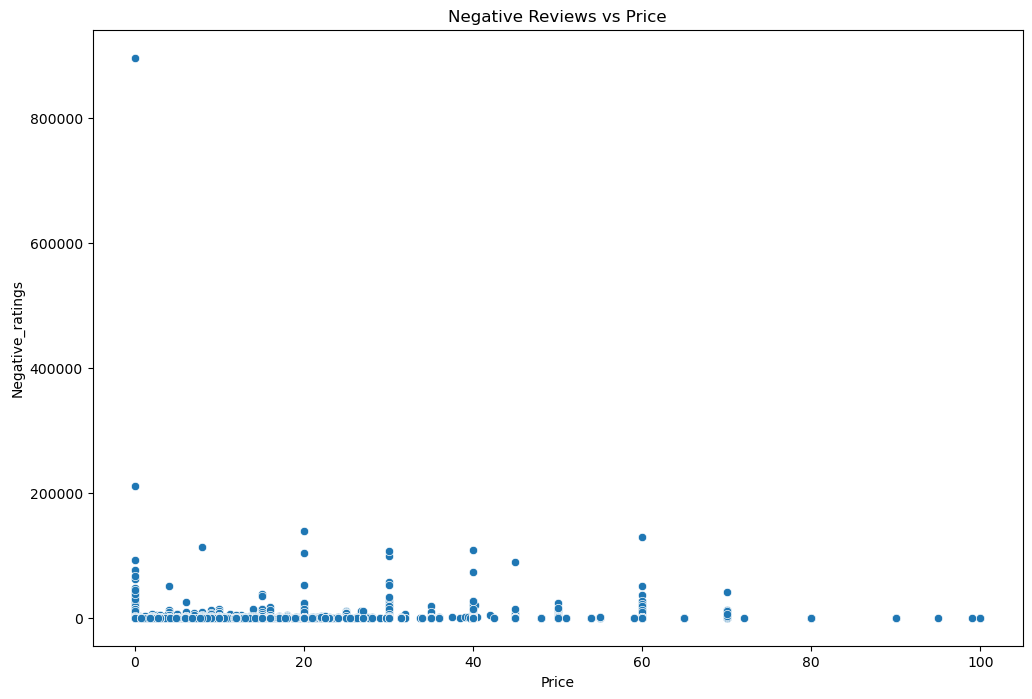

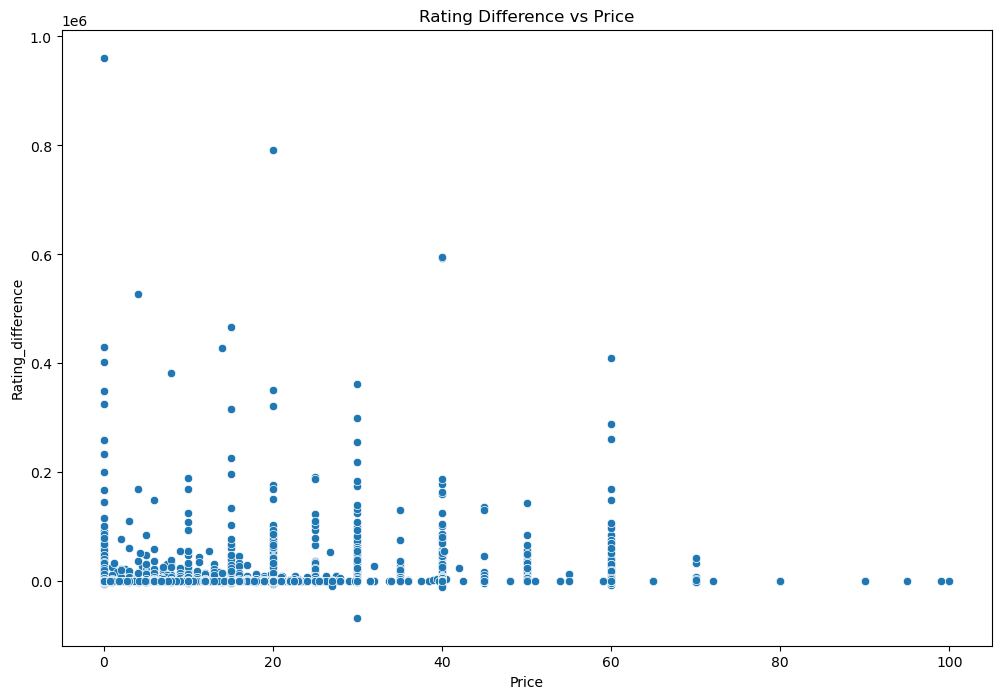

In [116]:
# Create and save plots
create_plot('Price', 'Positive_ratings', 'Positive Reviews vs Price', 'positive_vs_price.png')
create_plot('Price', 'Negative_ratings', 'Negative Reviews vs Price', 'negative_vs_price.png')
create_plot('Price', 'Rating_difference', 'Rating Difference vs Price', 'rating_difference_vs_price.png')

In [117]:
print("Plots created and saved as PNG files.")

Plots created and saved as PNG files.


In [118]:
from flask import Flask, send_file
import pandas as pd
import matplotlib.pyplot as plt

app = Flask(__name__)

In [119]:
# Load cleaned data
df_cleaned = pd.read_csv('cleaned_data.csv')

def create_plot_with_names(x_col, y_col, title, filename):
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    plt.scatter(df_cleaned[x_col], df_cleaned[y_col])
    plt.title(title)
    plt.xlabel('Price')
    plt.ylabel(y_col)
    
    # Annotate each point with game names
    for i, name in enumerate(df_cleaned['Name']):
        ax.annotate(name, (df_cleaned[x_col][i], df_cleaned[y_col][i]), fontsize=8, ha='right')

    plt.savefig(filename)
    plt.close()

In [120]:
@app.route('/plot/positive_vs_price')
def positive_vs_price():
    create_plot_with_names('Price', 'Positive_ratings', 'Positive Reviews vs Price', 'positive_vs_price_with_names.png')
    return send_file('positive_vs_price_with_names.png', mimetype='image/png')

@app.route('/plot/negative_vs_price')
def negative_vs_price():
    create_plot_with_names('Price', 'Negative_ratings', 'Negative Reviews vs Price', 'negative_vs_price_with_names.png')
    return send_file('negative_vs_price_with_names.png', mimetype='image/png')

@app.route('/plot/rating_difference_vs_price')
def rating_difference_vs_price():
    create_plot_with_names('Price', 'Rating_difference', 'Rating Difference vs Price', 'rating_difference_vs_price_with_names.png')
    return send_file('rating_difference_vs_price_with_names.png', mimetype='image/png')

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\Flowenol\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
